In [3]:
import tweepy
import pickle 
from twitter_keys import consumer_key,consumer_secret,access_token,access_secret
#create auth object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api= tweepy.API(auth)
JOHNKLEMMERSAX_tweets = api.user_timeline('JOHNKLEMMERSAX')
gallowsofficial_tweets = api.user_timeline('gallowsofficial')
Apply_NW_tweets = api.user_timeline('Apply_NW')
with open('Account1.pkl','wb') as f:
    pickle.dump(JOHNKLEMMERSAX_tweets,f)
with open('Account2.pkl','wb') as f:
    pickle.dump(gallowsofficial_tweets,f)
with open('Account3.pkl','wb') as f:
    pickle.dump(Apply_NW_tweets,f)

In [1]:
# Load Data
import pickle
with open('Account1.pkl','rb') as f:
    JOHNKLEMMERSAX_tweets = pickle.load(f)
with open('Account2.pkl','rb') as f:
    gallowsofficial_tweets = pickle.load(f)
with open('Account3.pkl','rb') as f:
    Apply_NW_tweets = pickle.load(f)

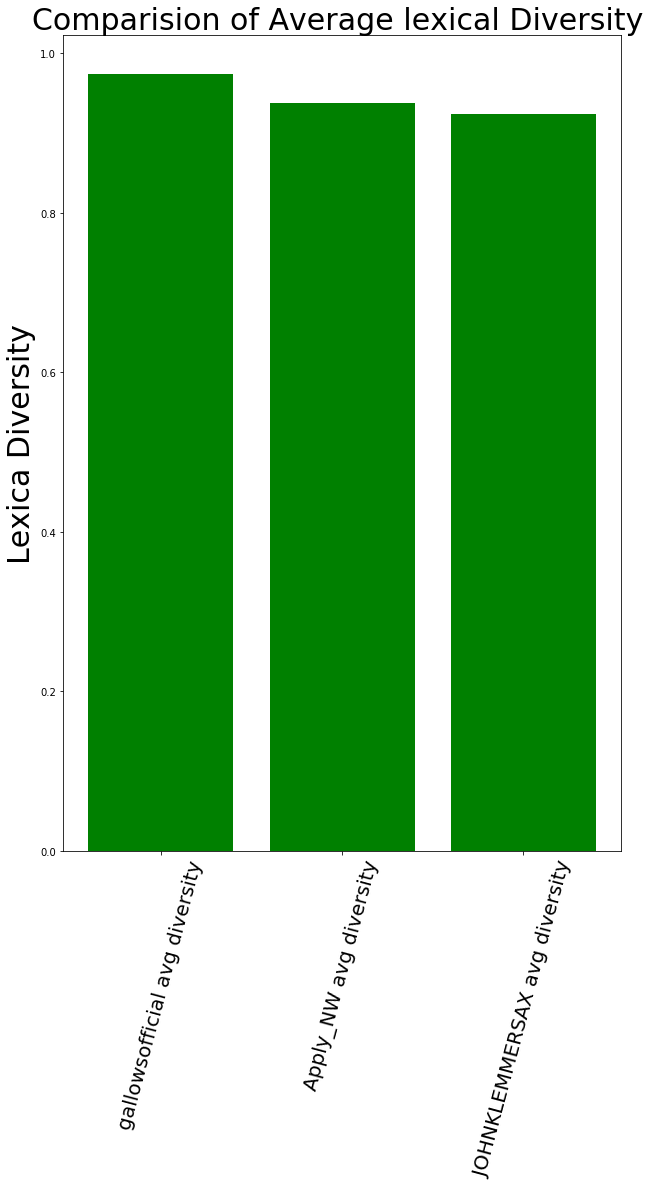

In [61]:
# Lexical Diversity
from helpers import lexical_diversity
import statistics

JOHNKLEMMERSAX_diversities = []
JOHNKLEMMERSAX_sources = []
for tweet in JOHNKLEMMERSAX_tweets:
    JOHNKLEMMERSAX_diversities.append(lexical_diversity(tweet.text))
    JOHNKLEMMERSAX_sources.append(tweet.source)
JOHNKLEMMERSAX_Devices = {}
for source in set(JOHNKLEMMERSAX_sources):
    JOHNKLEMMERSAX_Devices[source]= JOHNKLEMMERSAX_sources.count(source)




gallowsofficial_diversities = []
gallowsofficial_sources = []
for tweet in gallowsofficial_tweets:
    gallowsofficial_diversities.append(lexical_diversity(tweet.text))
    gallowsofficial_sources.append(tweet.source)
gallowsofficial_Devices = {}
for source in set(gallowsofficial_sources):
    gallowsofficial_Devices[source]= gallowsofficial_sources.count(source)




Apply_NW_diversities = []
Apply_NW_sources = []
for tweet in Apply_NW_tweets:
    Apply_NW_diversities.append(lexical_diversity(tweet.text))
    Apply_NW_sources.append(tweet.source)
Apply_NW_Devices = {}
for source in set(Apply_NW_sources):
    Apply_NW_Devices[source]= Apply_NW_sources.count(source)



                        
##print(gallowsofficial_Devices.get(Apply_NW_Devices, "0")*100/20)
average_Diversities = {}
average_Diversities['JOHNKLEMMERSAX avg diversity']= statistics.mean(JOHNKLEMMERSAX_diversities)
average_Diversities['gallowsofficial avg diversity']= statistics.mean(gallowsofficial_diversities)
average_Diversities['Apply_NW avg diversity']= statistics.mean(Apply_NW_diversities)


import matplotlib.pyplot as plt
heights = list(average_Diversities.values())
heights.sort(reverse=True)
plt.subplots(figsize=(10,15))
plt.bar(range(len(heights)),heights,width=0.8,color ='g')
plt.title("Comparision of Average lexical Diversity ",fontsize=30)
plt.ylabel("Lexica Diversity",fontsize=30)
keys = list(average_Diversities.keys())
keys.sort(reverse=True, key = lambda x: average_Diversities[x])
plt.xticks(range(len(heights)),keys,rotation=75, fontsize=20)
plt.show()



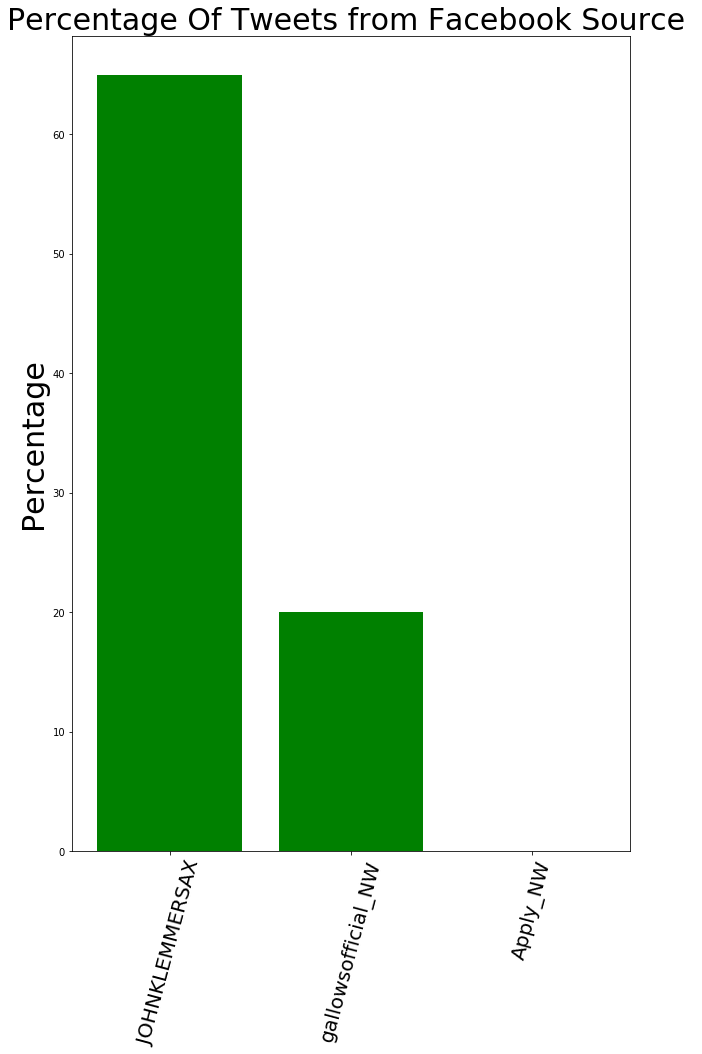

In [63]:
# Percentage of Tweets from Source
Tweets_From_Sources_Percentage= {}
Apply_NW_value = dict.get(Apply_NW_Devices,0)
if(Apply_NW_value==None):
    Apply_NW_value=0
JOHNKLEMMERSAX_value = JOHNKLEMMERSAX_Devices.get('Facebook',0)
gallowsofficial_value = gallowsofficial_Devices.get('Facebook',0)
Tweets_From_Sources_Percentage['Apply_NW'] =Apply_NW_value*100/20
Tweets_From_Sources_Percentage['JOHNKLEMMERSAX'] =JOHNKLEMMERSAX_value*100/20
Tweets_From_Sources_Percentage['gallowsofficial_NW'] =gallowsofficial_value*100/20


import matplotlib.pyplot as plt
heights = list(Tweets_From_Sources_Percentage.values())
heights.sort(reverse=True)
plt.subplots(figsize=(10,15))
plt.bar(range(len(heights)),heights,width=0.8,color ='')
plt.title("Percentage Of Tweets from Facebook Source ",fontsize=30)
plt.ylabel("Percentage",fontsize=30)
keys = list(Tweets_From_Sources_Percentage.keys())
keys.sort(reverse=True, key = lambda x: Tweets_From_Sources_Percentage[x])
plt.xticks(range(len(heights)),keys,rotation=75, fontsize=20)
plt.show()

In [ ]:
# Compare Accounts By their Status (verified or Not verified)